In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\mushroom.csv")

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.shape

(2000, 26)

In [5]:
df.size

52000

In [6]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
df.tail()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [9]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996    False
1997     True
1998     True
1999    False
Length: 2000, dtype: bool

In [11]:
df[df.duplicated()]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [12]:
df.value_counts('class')

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [13]:
target=df[['class']]
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [14]:
drop_columns=['class','Unnamed: 0']
features=df.drop(drop_columns,axis=1)

In [15]:
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199


In [16]:
features.shape

(2000, 24)

In [17]:
features.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [18]:
cat_col=[i for i in features.columns if features[i].dtype=='O']
num_col=[i for i in features.columns if features[i].dtype!='O']

In [19]:
print(cat_col)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [20]:
num_col

['stalk_height', 'cap_diameter']

In [21]:
features[cat_col]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,scaly,gray,white,universal,white,none,none,yellow,clustered,urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,silky,pink,orange,partial,orange,one,flaring,purple,abundant,leaves
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,fibrous,pink,orange,partial,white,one,zone,yellow,numerous,waste
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,silky,brown,red,partial,brown,two,evanescent,yellow,abundant,woods
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,fibrous,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods


In [22]:
features[num_col]

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [23]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [24]:
ord_enc=make_pipeline(OrdinalEncoder())

In [25]:
transformer=ColumnTransformer([('ord',ord_enc,cat_col)])

In [26]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['cap_shape', 'cap_surface', 'cap_color',
                                  'bruises', 'odor', 'gill_attachment',
                                  'gill_spacing', 'gill_size', 'gill_color',
                                  'stalk_shape', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_color_above_ring',
                                  'stalk_color_below_ring', 'veil_type',
                                  'veil_color', 'ring_number', 'ring_type',
                                  'spore_print_color', 'population',
                                  'habitat'])])>

In [27]:
df1=pd.DataFrame(transformer.fit_transform(features))

In [28]:
df1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,2.0,3.0,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,2.0,8.0,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,1.0,8.0,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,3.0,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,2.0,5.0,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,5.0,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,2.0,0.0,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,0.0,3.0,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0


In [29]:
simple_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [30]:
simple_imputer

SimpleImputer(strategy='most_frequent')

In [31]:
df1=pd.DataFrame(simple_imputer.fit_transform(df1))

In [32]:
df1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,2.0,3.0,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,2.0,8.0,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,1.0,8.0,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,1.0,3.0,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,2.0,5.0,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,0.0,5.0,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,2.0,0.0,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,0.0,3.0,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0


In [33]:
simple_imputer1=SimpleImputer(missing_values=np.nan,strategy='median')

In [34]:
simple_imputer1

SimpleImputer(strategy='median')

In [35]:
df2=pd.DataFrame(simple_imputer1.fit_transform(features[num_col]))

In [36]:
df2

,0,1
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [37]:
standard_scaler=StandardScaler()

In [38]:
df2=pd.DataFrame(standard_scaler.fit_transform(df2))

In [39]:
df2

,0,1
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765
...,...,...
1995,-0.695623,0.730771
1996,-0.527090,0.168525
1997,1.382181,-0.148193
1998,0.715199,-0.552164


In [40]:
features1=pd.concat([df1,df2],axis=1,ignore_index=True)

In [41]:
features1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.576459,-1.030123
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0,-1.216463,0.958407
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0,0.163717,-0.724904
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0,-0.871852,1.222967
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0,-0.695623,0.730771
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0,-0.527090,0.168525
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1.382181,-0.148193
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0.715199,-0.552164


In [42]:
old_name=range(0,22)
new_name=cat_col
old_name1=range(22,24)
new_name1=num_col

In [43]:
features1=features1.rename(columns=dict(zip(old_name,new_name)))
features1=features1.rename(columns=dict(zip(old_name1,new_name1)))                         

In [44]:
features1

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4.0,2.0,7.0,0.0,1.0,1.0,2.0,0.0,7.0,1.0,...,8.0,0.0,0.0,2.0,6.0,3.0,1.0,5.0,1.576459,-1.030123
1,4.0,0.0,6.0,0.0,1.0,3.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,2.0,6.0,1.0,2.0,5.0,-1.216463,0.958407
2,3.0,1.0,5.0,1.0,4.0,1.0,1.0,0.0,8.0,1.0,...,3.0,1.0,3.0,2.0,6.0,6.0,0.0,5.0,0.163717,-0.724904
3,0.0,2.0,4.0,1.0,3.0,3.0,0.0,0.0,6.0,0.0,...,5.0,0.0,3.0,2.0,0.0,4.0,1.0,0.0,-0.871852,1.222967
4,3.0,3.0,8.0,1.0,5.0,2.0,1.0,1.0,6.0,0.0,...,7.0,1.0,2.0,0.0,4.0,8.0,1.0,4.0,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,3.0,1.0,...,4.0,0.0,1.0,1.0,2.0,6.0,0.0,1.0,-0.695623,0.730771
1996,4.0,2.0,5.0,1.0,5.0,0.0,2.0,1.0,9.0,1.0,...,4.0,0.0,2.0,1.0,7.0,8.0,2.0,5.0,-0.527090,0.168525
1997,2.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,7.0,1.0,...,6.0,0.0,0.0,2.0,1.0,8.0,0.0,6.0,1.382181,-0.148193
1998,0.0,3.0,7.0,0.0,7.0,2.0,0.0,1.0,6.0,0.0,...,5.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0.715199,-0.552164


In [45]:
correlation=features1.corr()
correlation

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,0.011573,...,0.027522,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.024540,0.037743
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,-0.024032,...,-0.011742,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,0.043482,0.016606
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,-0.020397,...,0.036951,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,0.044086,-0.000489
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,0.007928,...,-0.077316,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,0.064644,-0.046946
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,0.009072,...,-0.007103,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.011217,-0.051549
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,-0.018698,...,0.007839,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.017367,-0.039526
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,0.051041,...,0.003012,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.016429,0.029169
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,-0.046759,...,-0.025614,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,-0.003273,-0.068743
gill_color,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,-0.056446,...,0.050684,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,0.026179,0.003895
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,-0.056446,1.000000,...,0.046013,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.036862,-0.004822


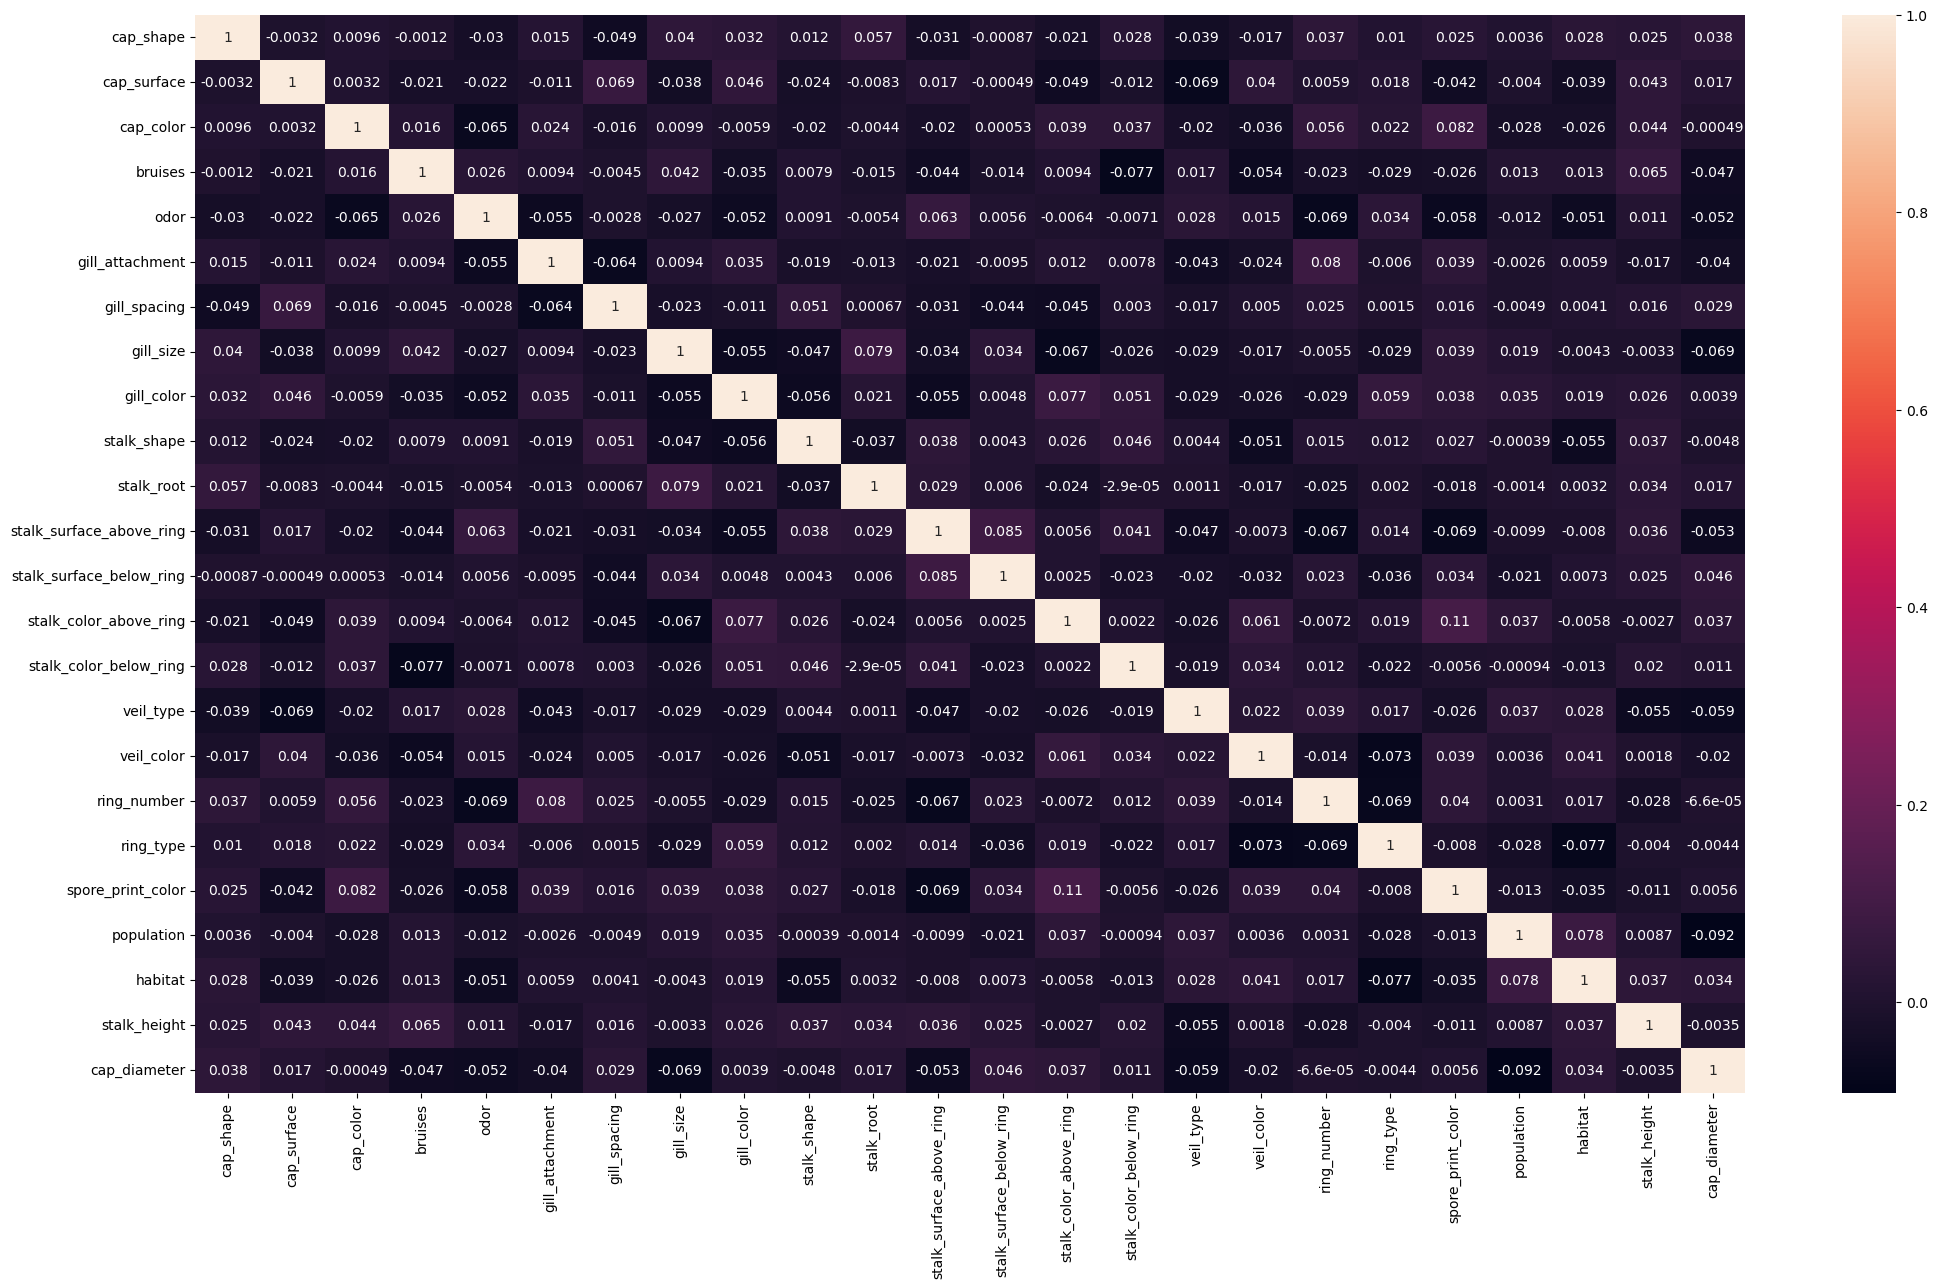

In [46]:
plt.figure(figsize=(25,14))
sns.heatmap(correlation,annot=True)
plt.show()

In [47]:
target

,class
0,poisonous
1,edible
2,poisonous
3,poisonous
4,poisonous
...,...
1995,poisonous
1996,poisonous
1997,poisonous
1998,poisonous


In [48]:
label_enc=LabelEncoder()

In [49]:
target['class']=label_enc.fit_transform(target['class'])

C:\Users\abhishekgh\AppData\Local\Temp\ipykernel_14188\3685913302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['class']=label_enc.fit_transform(target['class'])


In [50]:
target

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [51]:
x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.8,random_state=550)

In [52]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.3)

In [53]:
svc.fit(x_train,y_train)

C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.3)

In [54]:
y_pred=svc.predict(x_train)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [55]:
accuracy_score(y_train,y_pred)

1.0

In [56]:
y_pred1=svc.predict(x_test)
y_pred1

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [57]:
accuracy_score(y_test,y_pred1)

0.895

In [58]:
params={'C':[1.0,2.0,3.0,4.0,5.0,6.0],'kernel':['poly','rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]}

In [59]:
grid_search=GridSearchCV(svc,params)

In [60]:
import warnings
warnings.filterwarnings('ignore')


In [61]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(gamma=0.3),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [62]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [63]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.1)

In [64]:
svc.fit(x_train,y_train)

SVC(gamma=0.1)

In [65]:
y_pred2=svc.predict(x_test)
y_pred2

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [66]:
accuracy_score(y_test,y_pred2)

0.895

In [67]:
classification_report=classification_report(y_test,y_pred1)

In [68]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       119
           1       0.87      1.00      0.93       281

    accuracy                           0.90       400
   macro avg       0.93      0.82      0.86       400
weighted avg       0.91      0.90      0.89       400



## Comparison and Analysis

## 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function)

1.Model Complexity: Linear kernels are simpler and faster but may not capture complex patterns. RBF and polynomial kernels can model complex relationships but require careful tuning to avoid overfitting.

    
2.Data Distribution: The choice of kernel should consider the underlying distribution of the data. If the data is linearly separable, a linear kernel is preferable. For non-linear data, RBF is often a good starting point.


3.Hyperparameter Tuning: All kernel-based SVMs require careful tuning of parameters (e.g., C, degree, gamma) to optimize performance, which can involve cross-validation.

## 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

##Strengths of SVM for the Mushroom Dataset

1.High Dimensionality Handling

2.Effective for Non-linear Decision Boundaries

3.Robust to Overfitting

4.Clear Margin of Separation

##Weaknesses of SVM for the Mushroom Dataset

1.Sensitivity to Parameter Tuning

2.Computationally Intensive

3.Less Interpretability

4.Class Imbalance Sensitivity

##Visualizations and EDA Insights

Feature Importance: If EDA shows that some features are more critical in distinguishing between classes, SVMs could benefit from dimensionality reduction techniques or feature selection methods to improve efficiency and performance.

Class Distribution: Visualizing the class distribution helps identify potential class imbalance issues, guiding the application of methods to mitigate this before training the SVM.

## 3.	Discuss practical implications of SVM in real-world classification tasks

1. Medical Diagnosis
Application: SVMs are used to classify diseases based on patient data, such as lab results or imaging features.

Implications: They can provide robust classification for complex medical data, assisting in early diagnosis of conditions like cancer. However, interpretability can be a challenge, requiring additional tools to explain SVM decisions to healthcare professionals.

2. Text Classification
Application: SVMs are effective in spam detection, sentiment analysis, and document categorization.

Implications: Their ability to handle high-dimensional feature spaces (like words in a document) makes them suitable for text classification tasks. However, they require careful preprocessing of text data (e.g., vectorization, handling class imbalances)

3. Financial Forecasting
Application: SVMs can classify financial trends, such as predicting stock price movements based on historical data.

Implications: They can model complex relationships in financial datasets, but parameter tuning is crucial to avoid overfitting. Additionally, the “black box” nature can be a barrier for stakeholders seeking transparency.

4. Customer Segmentation
Application: Businesses use SVMs to classify customers based on behavior or demographics for targeted marketing.

Implications: SVMs can identify distinct customer segments, enabling personalized marketing strategies. Yet, the effectiveness depends on feature selection and data quality.